In [1]:
import pandas as pd
df_activities = pd.read_csv('cardioActivities.csv', parse_dates=['Date'], index_col='Date')

In [2]:
# Display 3 random rows from df_activities
print(df_activities.sample(3))

                                              Activity Id     Type Route Name  \
Date                                                                            
2017-03-30 19:06:29  9a3ec53a-d6f2-4ba7-87e1-085edf2a8064  Running        NaN   
2012-08-30 07:10:21  3067c059-dd1a-4df7-90b7-5e30b9d7e355  Walking        NaN   
2016-08-20 15:43:49  d71c6646-114b-4fb9-a011-d195c560591b  Cycling        NaN   

                     Distance (km) Duration Average Pace  \
Date                                                       
2017-03-30 19:06:29           8.48    46:53         5:32   
2012-08-30 07:10:21           1.43    15:12        10:40   
2016-08-20 15:43:49          31.48  1:29:50         2:51   

                     Average Speed (km/h)  Calories Burned  Climb (m)  \
Date                                                                    
2017-03-30 19:06:29                 10.85            607.0         90   
2012-08-30 07:10:21                  5.63             77.0          7   
2

In [3]:
# Print a summary of df_activities using the info() method
print(df_activities.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

In [16]:
# List of columns to drop
cols_to_drop = ['Activity Id', 'Route Name', 'Friend\'s Tagged', 'Notes', 'GPX File']

In [18]:
# Drop unnecessary columns if they exist in the dataframe
df_activities.drop(columns=[col for col in cols_to_drop if col in df_activities.columns], inplace=True)

In [19]:
# Calculate the activity type counts
activity_type_counts = df_activities['Type'].value_counts()
print("Activity Type Counts:")
print(activity_type_counts)

# Rename 'Other' values to 'Unicycling' in the Type column
df_activities['Type'] = df_activities['Type'].str.replace('Other', 'Unicycling')

# Count the missing values in each column
missing_values_count = df_activities.isnull().sum()
print("\nMissing Values Count:")
print(missing_values_count)

Activity Type Counts:
Running       459
Cycling        29
Walking        18
Unicycling      2
Name: Type, dtype: int64

Missing Values Count:
Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64


In [20]:
# Calculate the sample mean for Average Heart Rate (bpm) for the 'Cycling' activity type
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()

# Filter the df_activities for the 'Cycling' activity type and create a copy
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()

# Fill in the missing values for Average Heart Rate (bpm) in df_cycle with the average heart rate
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)

# Count the missing values for all columns in df_cycle
missing_values_count_cycle = df_cycle.isnull().sum()
print("\nMissing Values Count in df_cycle:")
print(missing_values_count_cycle)


Missing Values Count in df_cycle:
Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Calories Burned             0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64


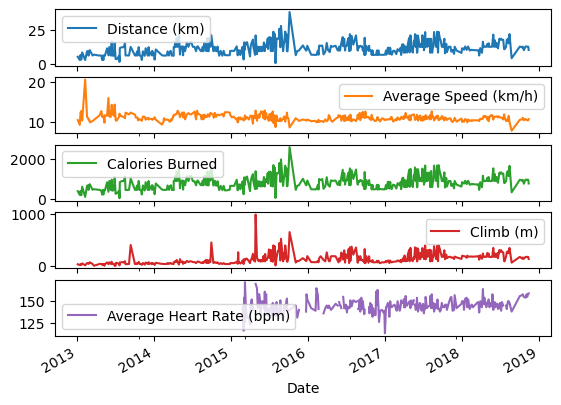

In [23]:
import matplotlib.pyplot as plt
# Subset df_activities for running data from 2013 through 2018
runs_subset_2013_2018 = df_activities[(df_activities['Type'] == 'Running') & (df_activities.index.year >= 2013) & (df_activities.index.year <= 2018)]

# Plot the data
runs_subset_2013_2018[['Distance (km)', 'Duration', 'Average Pace', 'Average Speed (km/h)', 'Calories Burned', 'Climb (m)', 'Average Heart Rate (bpm)']].plot(subplots=True)
plt.show()

In [24]:
# Subset df_activities for running data from 2015 through 2018
runs_subset_2015_2018 = df_activities[(df_activities['Type'] == 'Running') & (df_activities.index.year >= 2015) & (df_activities.index.year <= 2018)]

# Count the annual averages
annual_averages = runs_subset_2015_2018.resample('A').mean()

# Count the average weekly statistics
weekly_averages = runs_subset_2015_2018.resample('W').mean()

# Filter from dataset column Distance (km) and count the average number of trainings per week
weekly_counts_average = runs_subset_2015_2018['Distance (km)'].resample('W').count().mean()

print("\nAnnual Averages:")
print(annual_averages)
print("\nWeekly Averages:")
print(weekly_averages)
print("\nWeekly Counts Average:")
print(weekly_counts_average)


Annual Averages:
            Distance (km)  Average Speed (km/h)  Calories Burned   Climb (m)  \
Date                                                                           
2015-12-31      13.602805             10.998902       932.906138  160.170732   
2016-12-31      11.411667             10.837778       796.152777  133.194444   
2017-12-31      12.935176             10.959059       914.164706  169.376471   
2018-12-31      13.339063             10.777969       952.359375  191.218750   

            Average Heart Rate (bpm)  
Date                                  
2015-12-31                143.231884  
2016-12-31                143.301587  
2017-12-31                145.277108  
2018-12-31                148.258065  

Weekly Averages:
            Distance (km)  Average Speed (km/h)  Calories Burned  Climb (m)  \
Date                                                                          
2015-01-04       9.780000             11.120000       654.000000       51.0   
2015-01-11  

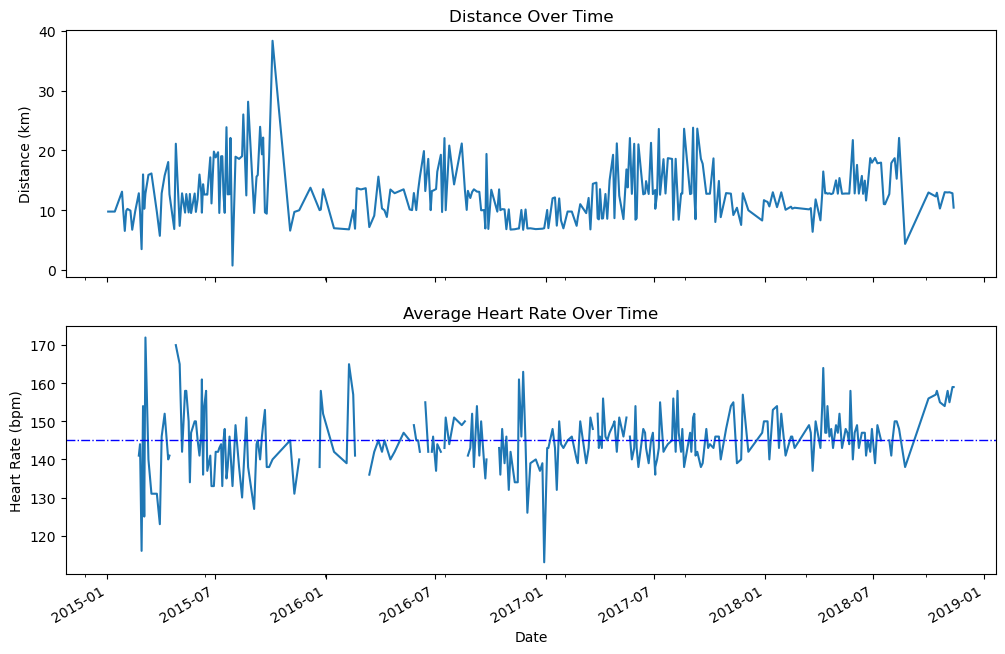

In [25]:
# Subset df_activities for running data from 2015 through 2018
runs_subset_2015_2018 = df_activities[(df_activities['Type'] == 'Running') & (df_activities.index.year >= 2015) & (df_activities.index.year <= 2018)]

# Select information for distance and heart rate
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

# Create two subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

# Plot distance on the first subplot
runs_distance.plot(ax=ax1)
ax1.set_title('Distance Over Time')
ax1.set_ylabel('Distance (km)')

# Plot heart rate on the second subplot
runs_hr.plot(ax=ax2)
ax2.set_title('Average Heart Rate Over Time')
ax2.set_ylabel('Heart Rate (bpm)')

# Add a horizontal line for the average value of heart rate
avg_hr = runs_hr.mean()
ax2.axhline(y=avg_hr, color='blue', linewidth=1, linestyle='-.')

# Show the plot
plt.show()

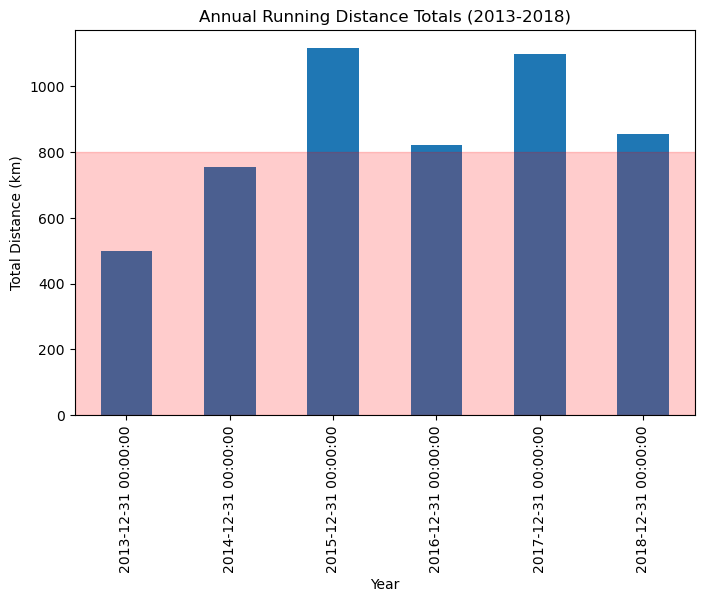

In [26]:
# Subset df_activities for running data from 2013 through 2018 and select the Distance (km) column
runs_subset_2013_2018 = df_activities[(df_activities['Type'] == 'Running') & (df_activities.index.year >= 2013) & (df_activities.index.year <= 2018)]
df_run_dist_annual = runs_subset_2013_2018['Distance (km)'].resample('A').sum()

# Create a plot
plt.figure(figsize=(8, 5))

# Plot the annual totals
ax = df_run_dist_annual.plot(kind='bar')

# Customize the plot with horizontal span
ax.axhspan(0, 800, color='red', alpha=0.2)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total Distance (km)')
ax.set_title('Annual Running Distance Totals (2013-2018)')

# Show the plot
plt.show()

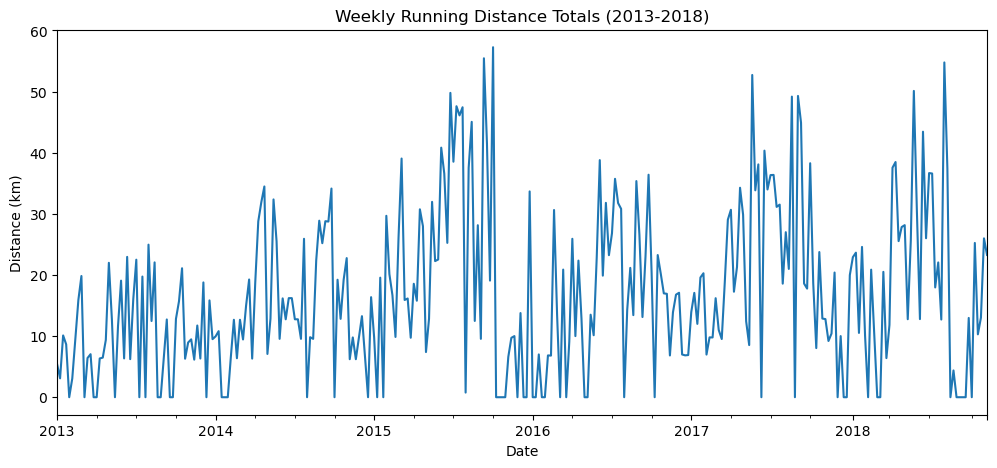

In [27]:
# Subset df_activities for running data from 2013 through 2018 and select the Distance (km) column
df_run_dist_wkly = df_activities[(df_activities['Type'] == 'Running') & (df_activities.index.year >= 2013) & (df_activities.index.year <= 2018)]['Distance (km)']

# Resample weekly and fill NaN values with the backward fill method
df_run_dist_wkly = df_run_dist_wkly.resample('W').sum().bfill()

# Create a plot
plt.figure(figsize=(12, 5))

# Plot the weekly running distances
ax = df_run_dist_wkly.plot()
# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Distance (km)')
ax.set_title('Weekly Running Distance Totals (2013-2018)')

# Show the plot
plt.show()

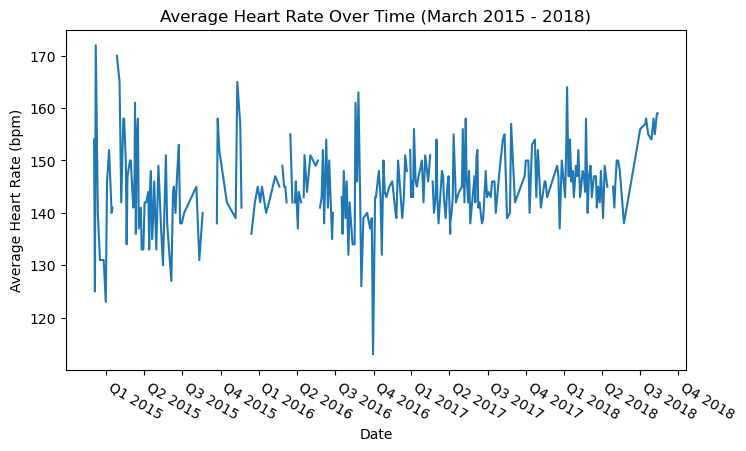

In [28]:
# Subset df_activities for running data from March 2015 through 2018 and select the Average Heart Rate (bpm) column
df_run_hr_all = df_activities[(df_activities['Type'] == 'Running') & (df_activities.index >= '2015-03-01') & (df_activities.index <= '2018-12-31')]['Average Heart Rate (bpm)']

# Create a plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the average heart rate data
df_run_hr_all.plot(ax=ax)

# Set customized x-axis ticks
zone_names = ['Q1 2015', 'Q2 2015', 'Q3 2015', 'Q4 2015', 'Q1 2016', 'Q2 2016', 'Q3 2016', 'Q4 2016', 'Q1 2017', 'Q2 2017', 'Q3 2017', 'Q4 2017', 'Q1 2018', 'Q2 2018', 'Q3 2018', 'Q4 2018']
ax.set_xticks(pd.date_range(start='2015-03-01', end='2018-12-31', freq='Q'))
ax.set_xticklabels(labels=zone_names, rotation=-30, ha='left')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Average Heart Rate (bpm)')
ax.set_title('Average Heart Rate Over Time (March 2015 - 2018)')

# Show the plot
plt.show()

In [29]:
# Concatenate df_run with df_walk and df_cycle using append(), then sort based on the index in descending order
df_walk = df_activities[df_activities['Type'] == 'Walking']
df_cycle = df_activities[df_activities['Type'] == 'Cycling']
df_run = df_activities[df_activities['Type'] == 'Running']

df_run_walk_cycle = df_run.append([df_walk, df_cycle]).sort_index(ascending=False)

# Group by activity type and sum the relevant columns
dist_climb_cols = ['Distance (km)', 'Climb (m)']
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

# Use the stack() method to show a compact reshaped form of the full summary report
df_summary = df_totals.stack()

print("\nConcatenated and Summarized DataFrame:")
print(df_summary)


Concatenated and Summarized DataFrame:
Type                  
Cycling  Distance (km)      680.58
         Climb (m)         6976.00
Running  Distance (km)     5224.50
         Climb (m)        57278.00
Walking  Distance (km)       33.45
         Climb (m)          349.00
dtype: float64


C:\Users\achsa\AppData\Local\Temp\ipykernel_27784\3371680784.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_run_walk_cycle = df_run.append([df_walk, df_cycle]).sort_index(ascending=False)


In [30]:
# Your running history details
your_total_km = 5224
your_shoes = 7

# Forrest's running history details
forrest_total_km = 24700

# Calculate the rate of shoes per km
shoes_per_km = your_shoes / your_total_km

# Calculate the number of shoes Forrest would need
forrest_shoes = forrest_total_km * shoes_per_km

print(f"Forrest Gump would need approximately {forrest_shoes:.0f} pairs of shoes for his run of 24,700 km.")

Forrest Gump would need approximately 33 pairs of shoes for his run of 24,700 km.
